# Laboratorio 1 - Introduccion a los vehiculos inteligentes
* Saez, Lautaro Andres

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
columns_names = ['time', 
                 'acel_indentifier', 
                 'acel_x', 'acel_y', 'acel_z',
                 'giros_indentifier',
                 'giros_x', 'giros_y', 'giros_z',
                 'magneto_indetifier',
                 'magneto_x', 'magneto_y', 'magneto_z'
                ]
df = pd.read_csv('./dataset/telemetria01_tp1.csv', sep=',' , names = columns_names)
df = df.dropna()
df[ columns_names[12] ] = [ float(i) for i in list( df[ columns_names[12] ] ) ]
df['time'] = df['time'] - list( df['time'] )[0]

t = list( df['time'] )
del df['time']

columns_names.pop( 0 )
print( columns_names )
df.head(15)


['acel_indentifier', 'acel_x', 'acel_y', 'acel_z', 'giros_indentifier', 'giros_x', 'giros_y', 'giros_z', 'magneto_indetifier', 'magneto_x', 'magneto_y', 'magneto_z']


,acel_indentifier,acel_x,acel_y,acel_z,giros_indentifier,giros_x,giros_y,giros_z,magneto_indetifier,magneto_x,magneto_y,magneto_z
9,3,0.630,-0.316,9.955,4.0,0.037,-0.026,-0.011,5.0,-1.199,-20.390,8.846
10,3,0.450,-0.211,9.997,4.0,0.001,-0.062,0.003,5.0,-1.124,-20.465,8.846
11,3,0.515,-0.176,10.044,4.0,-0.019,-0.054,0.009,5.0,-1.299,-20.690,8.846
12,3,0.548,-0.207,10.132,4.0,-0.016,-0.045,0.011,5.0,-1.237,-20.540,8.658
13,3,0.537,-0.218,10.206,4.0,0.001,-0.016,0.029,5.0,-1.019,-20.630,8.636
14,3,0.442,-0.188,10.150,4.0,0.039,0.088,0.047,5.0,-1.049,-20.765,8.546
15,3,0.474,-0.239,10.107,4.0,0.018,0.066,0.028,5.0,-1.071,-20.711,8.482
16,3,0.559,-0.230,10.095,4.0,-0.030,-0.011,-0.010,5.0,-1.199,-20.690,8.490
17,3,0.534,-0.150,9.997,4.0,-0.051,0.009,0.012,5.0,-1.218,-20.727,8.415
18,3,0.609,-0.219,9.950,4.0,-0.043,-0.016,0.016,5.0,-1.237,-20.840,8.358


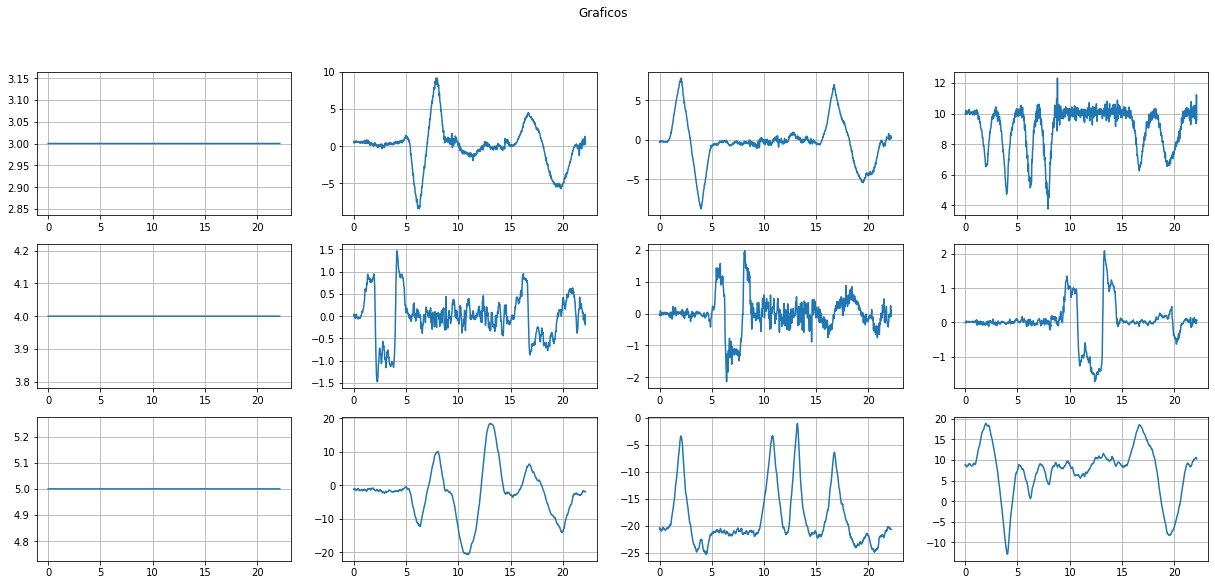

In [132]:
keys = df.keys()
number_keys = len( keys ) - 1

fig, ax = plt.subplots( 3, 4, figsize=(21,9) )
fig.suptitle( 'Graficos' )
for i in range( 3 ):
    for j in range( 4 ):
        ax[i][j].plot( t ,df[ columns_names[ 4*(i) + j ] ]  )
        ax[i][j].grid()
        
plt.savefig( '' )

## Filtrado basico

In [133]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [138]:
def filtro_media_movil( datos ,h_inferior, h_superior ):
    datos_filtrados = []
    for i in range( h_inferior ,len( datos ) - h_superior ):
        datos_filtrados.append( np.mean( datos[i-h_inferior:(i+h_superior)] ) )
    return datos_filtrados
        
def graficar_dato_filtrado( h, medicion ):
    datos = list( df[ columns_names[ medicion ] ] )
    numero_filtros = 1
    filtrado = list( range( numero_filtros + 2 ) )
    #fig, ax = plt.subplots( numero_filtros + 1, figsize=(21,9) )
    
    color_marker = ['r-', 'k', '#ffF200']
    
    filtrado[0] = datos
    filtrado[1] = filtro_media_movil( datos , h//2, h//2 )
    filtrado[2] = filtro_media_movil( datos, 0, h )
    
    for i in range( numero_filtros + 1):
        plt.plot( filtrado[i], color_marker[i] )
        
    plt.grid()

interact( graficar_dato_filtrado, h=widgets.IntSlider(min=2, max=21, step=2), medicion=widgets.IntSlider( min=0, max=len( columns_names ) ) )

interactive(children=(IntSlider(value=2, description='h', max=21, min=2, step=2), IntSlider(value=0, descripti…

<function __main__.graficar_dato_filtrado(h, medicion)>